In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("h1b_kaggle.csv/h1b_kaggle.csv")

In [3]:
df.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [4]:
df["CASE_STATUS"].unique()

array(['CERTIFIED-WITHDRAWN', 'WITHDRAWN', 'CERTIFIED', 'DENIED',
       'REJECTED', 'INVALIDATED',
       'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED', nan],
      dtype=object)

# Information over all the years

In [5]:
len(df["JOB_TITLE"].unique())

287550

### by states (top 10)

In [6]:
df["STATE"] = df["WORKSITE"].apply(lambda x: x.split(",")[-1])

In [7]:
df["STATE"].value_counts()[:10]

 CALIFORNIA       559942
 TEXAS            294455
 NEW YORK         291412
 NEW JERSEY       214078
 ILLINOIS         160814
 MASSACHUSETTS    116466
 PENNSYLVANIA     109960
 FLORIDA          105773
 GEORGIA          103168
 WASHINGTON       102801
Name: STATE, dtype: int64

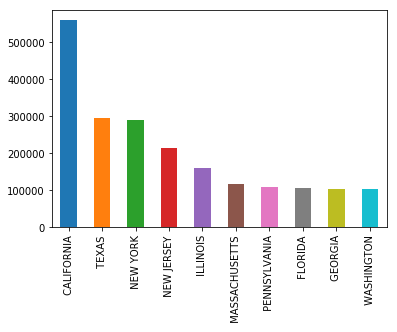

In [8]:
df["STATE"].value_counts()[:10].plot(kind='bar')

### Most h1b filed by job titles (top 10)

In [9]:
df["JOB_TITLE"].value_counts()[:10]

PROGRAMMER ANALYST          249038
SOFTWARE ENGINEER           121307
COMPUTER PROGRAMMER          70570
SYSTEMS ANALYST              61965
SOFTWARE DEVELOPER           42907
BUSINESS ANALYST             39681
COMPUTER SYSTEMS ANALYST     35086
TECHNOLOGY LEAD - US         28350
SENIOR SOFTWARE ENGINEER     27133
TECHNOLOGY ANALYST - US      26055
Name: JOB_TITLE, dtype: int64

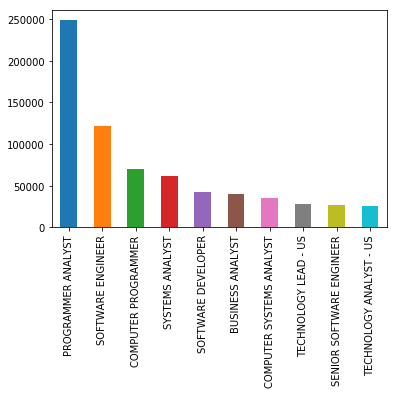

In [10]:
df["JOB_TITLE"].value_counts()[:10].plot(kind='bar')

### Most h1b filed by employers (top 10)

In [11]:
df["EMPLOYER_NAME"].value_counts()[:10]

INFOSYS LIMITED                                    130592
TATA CONSULTANCY SERVICES LIMITED                   64726
WIPRO LIMITED                                       48117
DELOITTE CONSULTING LLP                             36742
IBM INDIA PRIVATE LIMITED                           34219
ACCENTURE LLP                                       33447
MICROSOFT CORPORATION                               25576
HCL AMERICA, INC.                                   22678
ERNST & YOUNG U.S. LLP                              18232
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION     17528
Name: EMPLOYER_NAME, dtype: int64

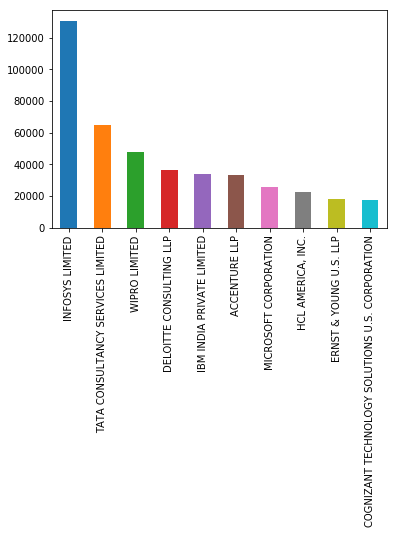

In [12]:
df["EMPLOYER_NAME"].value_counts()[:10].plot(kind='bar')

### breakdown of  h1b filed by Infosys

#### by job title

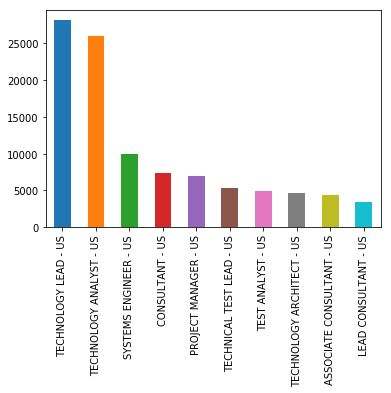

In [13]:
df[df["EMPLOYER_NAME"] == "INFOSYS LIMITED"]["JOB_TITLE"].value_counts()[:10].plot(kind='bar')

#### by year

In [14]:
df[df["EMPLOYER_NAME"] == "INFOSYS LIMITED"]["YEAR"].value_counts()

2015.0    33245
2013.0    32223
2016.0    25352
2014.0    23759
2012.0    15818
2011.0      195
Name: YEAR, dtype: int64

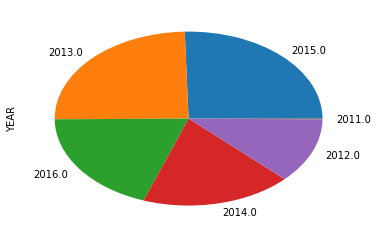

In [15]:
df[df["EMPLOYER_NAME"] == "INFOSYS LIMITED"]["YEAR"].value_counts().plot(kind='pie')

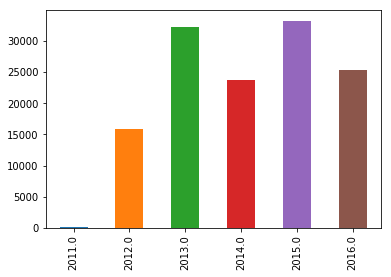

In [16]:
df[df["EMPLOYER_NAME"] == "INFOSYS LIMITED"]["YEAR"].value_counts().sort_index().plot(kind='bar')

#### number of h1b 'CERTIFIED' vs 'OTHERS'

In [17]:
series = df[df["EMPLOYER_NAME"] == "INFOSYS LIMITED"]["CASE_STATUS"].value_counts()

In [18]:
data = {"CERTIFIED" :series["CERTIFIED"], "NON-CERTIED":sum(series.drop(["CERTIFIED"], axis=0))}

In [19]:
data

{'CERTIFIED': 129916, 'NON-CERTIED': 676}

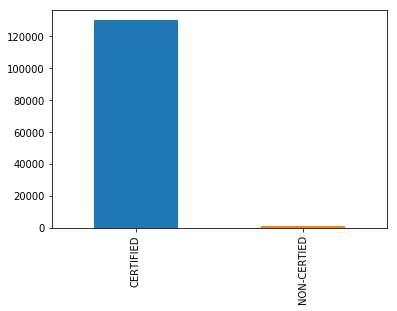

In [20]:
pd.Series(data = data).plot(kind='bar')

### h1b filed by Google, Facebook, Amazon, Apple, LinkedIn, Adobe, Vmware

In [21]:
for i in df["EMPLOYER_NAME"].astype(str).unique():
    if "ibm" in i.lower():
        print(i)

IBM CORPORATION
IBM INDIA PRIVATE LIMITED
IBM INDIA PRIVATE LTD
IBM INDIA PRIVATE LINMITED
IBM GLOBAL SYSTEMS INC
IBM GLOBAL SYSTEMS, INC.
IBM INDIA PVT LTD
IBM INIDA PRIVATE LIMITED
IBM INDIA PVT LIMITED
IBMS LLC
IBM CORPORATE
IBM CORP
SOFTLAYER, AN IBM COMPANY
IBM INDIA
IBM INDIA PVT. LTD.
IBM INDIA CORPORATION
IBM COORPORATION
IBM LIMITED PRIVATE LIMITED
IBM
IBM CORPORATION0
IBM COPRORATION
IBM COPORATION
IBM INDIA PRIVATE LIMITES
IBMB, LLC
IBMI INDIA PRIVATE LIMITED
IBM INDIA PRIVATE LIMTED
UNICA CORPORATION, AN IBM COMPANY
IBM INDIA PRIVATE LTD.
IBM INDIA PRIVATE LIMITED.


### Distribution by state

In [22]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [23]:
states_reversed = {}
for key in states:
    states_reversed[states[key].upper()] = key

In [24]:
df["STATE"] = df["STATE"].apply(lambda x: x.strip())
df['CODE'] = df['STATE'].astype(str).map(states_reversed)

In [25]:
df_test = pd.DataFrame(df["CODE"].value_counts())

In [26]:
df_test = df_test.reset_index()

In [27]:
import plotly.offline as offline
offline.init_notebook_mode(connected=True)
import plotly
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]


data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df_test['index'],
        z = df_test["CODE"].astype(float),
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Number")
        ) ]

layout = dict(
        title = '2011-2016 h1b visa by state',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
plotly.offline.iplot( fig)

### Yearly distribution of H1B visa's by state

In [39]:
for i in range(2011,2017):
    df_t = df[df['YEAR'] == i]
    df_t = pd.DataFrame(df_t["CODE"].value_counts())
    df_t = df_t.reset_index()
    
    scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

    data = [ dict(
            type='choropleth',
            colorscale = scl,
            autocolorscale = False,
            locations = df_t['index'],
            z = df_t["CODE"].astype(float),
            locationmode = 'USA-states',
            marker = dict(
                line = dict (
                    color = 'rgb(255,255,255)',
                    width = 2
                ) ),
            colorbar = dict(
                title = "Number")
            ) ]

    s = str(i) + ' h1b visa by state'
    
    layout = dict(
            title = s,
            geo = dict(
                scope='usa',
                projection=dict( type='albers usa' ),
                showlakes = True,
                lakecolor = 'rgb(255, 255, 255)'),
                 )

    fig = dict( data=data, layout=layout )
    plotly.offline.iplot( fig)

### Number of H1B filed by infosys in USA 

In [29]:
for i in range(2011,2017):
    df_t = df[(df['YEAR'] == i) & ( df["EMPLOYER_NAME"] == "INFOSYS LIMITED")]
    df_t = pd.DataFrame(df_t["CODE"].value_counts())
    df_t = df_t.reset_index()
    
    scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

    data = [ dict(
            type='choropleth',
            colorscale = scl,
            autocolorscale = False,
            locations = df_t['index'],
            z = df_t["CODE"].astype(float),
            locationmode = 'USA-states',
            marker = dict(
                line = dict (
                    color = 'rgb(255,255,255)',
                    width = 2
                ) ),
            colorbar = dict(
                title = "Number")
            ) ]

    s = str(i) + ' h1b visa by state'
    
    layout = dict(
            title = s,
            geo = dict(
                scope='usa',
                projection=dict( type='albers usa' ),
                showlakes = True,
                lakecolor = 'rgb(255, 255, 255)'),
                 )

    fig = dict( data=data, layout=layout )
    plotly.offline.iplot( fig)

### Number of H1B filed by google in USA

In [30]:
def func(x):
    if type(x) == str and 'google' in x.lower():
        return True
    return False

In [31]:
for i in range(2011,2017):
    df_t = df[(df['YEAR'] == i) & (df["EMPLOYER_NAME"].apply(func))]
    df_t = pd.DataFrame(df_t["CODE"].value_counts())
    df_t = df_t.reset_index()
    
    scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

    data = [ dict(
            type='choropleth',
            colorscale = scl,
            autocolorscale = False,
            locations = df_t['index'],
            z = df_t["CODE"].astype(float),
            locationmode = 'USA-states',
            marker = dict(
                line = dict (
                    color = 'rgb(255,255,255)',
                    width = 2
                ) ),
            colorbar = dict(
                title = "Number")
            ) ]

    s = str(i) + ' h1b visa filed by google by state'
    
    layout = dict(
            title = s,
            geo = dict(
                scope='usa',
                projection=dict( type='albers usa' ),
                showlakes = True,
                lakecolor = 'rgb(255, 255, 255)'),
                 )

    fig = dict( data=data, layout=layout )
    plotly.offline.iplot( fig)

## h1b filed by facebook by year

In [32]:
def func(x):
    if type(x) == str and 'facebook' in x.lower():
        return True
    return False

In [33]:
for i in range(2011,2017):
    df_t = df[(df['YEAR'] == i) & (df["EMPLOYER_NAME"].apply(func))]
    df_t = pd.DataFrame(df_t["CODE"].value_counts())
    df_t = df_t.reset_index()
    
    scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

    data = [ dict(
            type='choropleth',
            colorscale = scl,
            autocolorscale = False,
            locations = df_t['index'],
            z = df_t["CODE"].astype(float),
            locationmode = 'USA-states',
            marker = dict(
                line = dict (
                    color = 'rgb(255,255,255)',
                    width = 2
                ) ),
            colorbar = dict(
                title = "Number")
            ) ]

    s = str(i) + ' h1b visa filed by facebook by state'
    
    layout = dict(
            title = s,
            geo = dict(
                scope='usa',
                projection=dict( type='albers usa' ),
                showlakes = True,
                lakecolor = 'rgb(255, 255, 255)'),
                 )

    fig = dict( data=data, layout=layout )
    plotly.offline.iplot( fig)

In [34]:
df_t = pd.DataFrame(df_t["CODE"].value_counts())
df_t = df_t.reset_index()

In [36]:
df_t = pd.DataFrame(df_t["CODE"].value_counts())
df_t = df_t.reset_index()

In [37]:
def func(x):
    if type(x) == str and 'ibm' in x.lower():
        return True
    return False

In [38]:
for i in range(2011,2017):
    df_t = df[(df['YEAR'] == i) & (df["EMPLOYER_NAME"].apply(func))]
    df_t = pd.DataFrame(df_t["CODE"].value_counts())
    df_t = df_t.reset_index()
    
    scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

    data = [ dict(
            type='choropleth',
            colorscale = scl,
            autocolorscale = False,
            locations = df_t['index'],
            z = df_t["CODE"].astype(float),
            locationmode = 'USA-states',
            marker = dict(
                line = dict (
                    color = 'rgb(255,255,255)',
                    width = 2
                ) ),
            colorbar = dict(
                title = "Number")
            ) ]

    s = str(i) + ' h1b visa filed by ibm by state'
    
    layout = dict(
            title = s,
            geo = dict(
                scope='usa',
                projection=dict( type='albers usa' ),
                showlakes = True,
                lakecolor = 'rgb(255, 255, 255)'),
                 )

    fig = dict( data=data, layout=layout )
    plotly.offline.iplot( fig)

## Average wage of h1b by year and by state